In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.shape

(301, 9)

In [6]:
df1 = df.drop('Car_Name', axis=1)

In [7]:
df1['current_Year']=2021
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [8]:
df1['Used_year']= df1['current_Year']-df1['Year']
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_Year,Used_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [9]:
df1_cat = df1.select_dtypes(include = ['O'])
df1_cat.columns            

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [10]:
print(df1['Fuel_Type'].unique())
print(df1['Seller_Type'].unique())
print(df1['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Fule_Type_le']=le.fit_transform(df1[["Fuel_Type"]])
df1['Seller_Type_le']=le.fit_transform(df1[['Seller_Type']])
df1['Transmission_le']=le.fit_transform(df1[["Transmission"]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_Year,Used_year,Fule_Type_le,Seller_Type_le,Transmission_le
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7,2,0,1
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8,1,0,1
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4,2,0,1
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10,2,0,1
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7,1,0,1


In [13]:
df1.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'current_Year', 'Used_year',
       'Fule_Type_le', 'Seller_Type_le', 'Transmission_le'],
      dtype='object')

In [14]:
final_df = df1[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'current_Year', 'Used_year',
       'Fule_Type_le', 'Seller_Type_le', 'Transmission_le']]
final_df.drop(columns=['Fuel_Type', 'Seller_Type', 'Transmission','current_Year','Year'],axis=1,inplace=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Used_year,Fule_Type_le,Seller_Type_le,Transmission_le
0,3.35,5.59,27000,0,7,2,0,1
1,4.75,9.54,43000,0,8,1,0,1
2,7.25,9.85,6900,0,4,2,0,1
3,2.85,4.15,5200,0,10,2,0,1
4,4.60,6.87,42450,0,7,1,0,1


In [15]:
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Used_year,Fule_Type_le,Seller_Type_le,Transmission_le
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,-0.509467,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,-0.440415,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,-0.166801,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,0.055705,0.124269,-0.050316
Used_year,-0.236141,0.047584,0.524342,0.182104,1.000000,0.053643,0.039896,-0.000394
Fule_Type_le,-0.509467,-0.440415,-0.166801,0.055705,0.053643,1.000000,0.352415,0.080466
Seller_Type_le,-0.550724,-0.512030,-0.101419,0.124269,0.039896,0.352415,1.000000,0.063240
Transmission_le,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,0.080466,0.063240,1.000000


In [16]:
import seaborn as sns

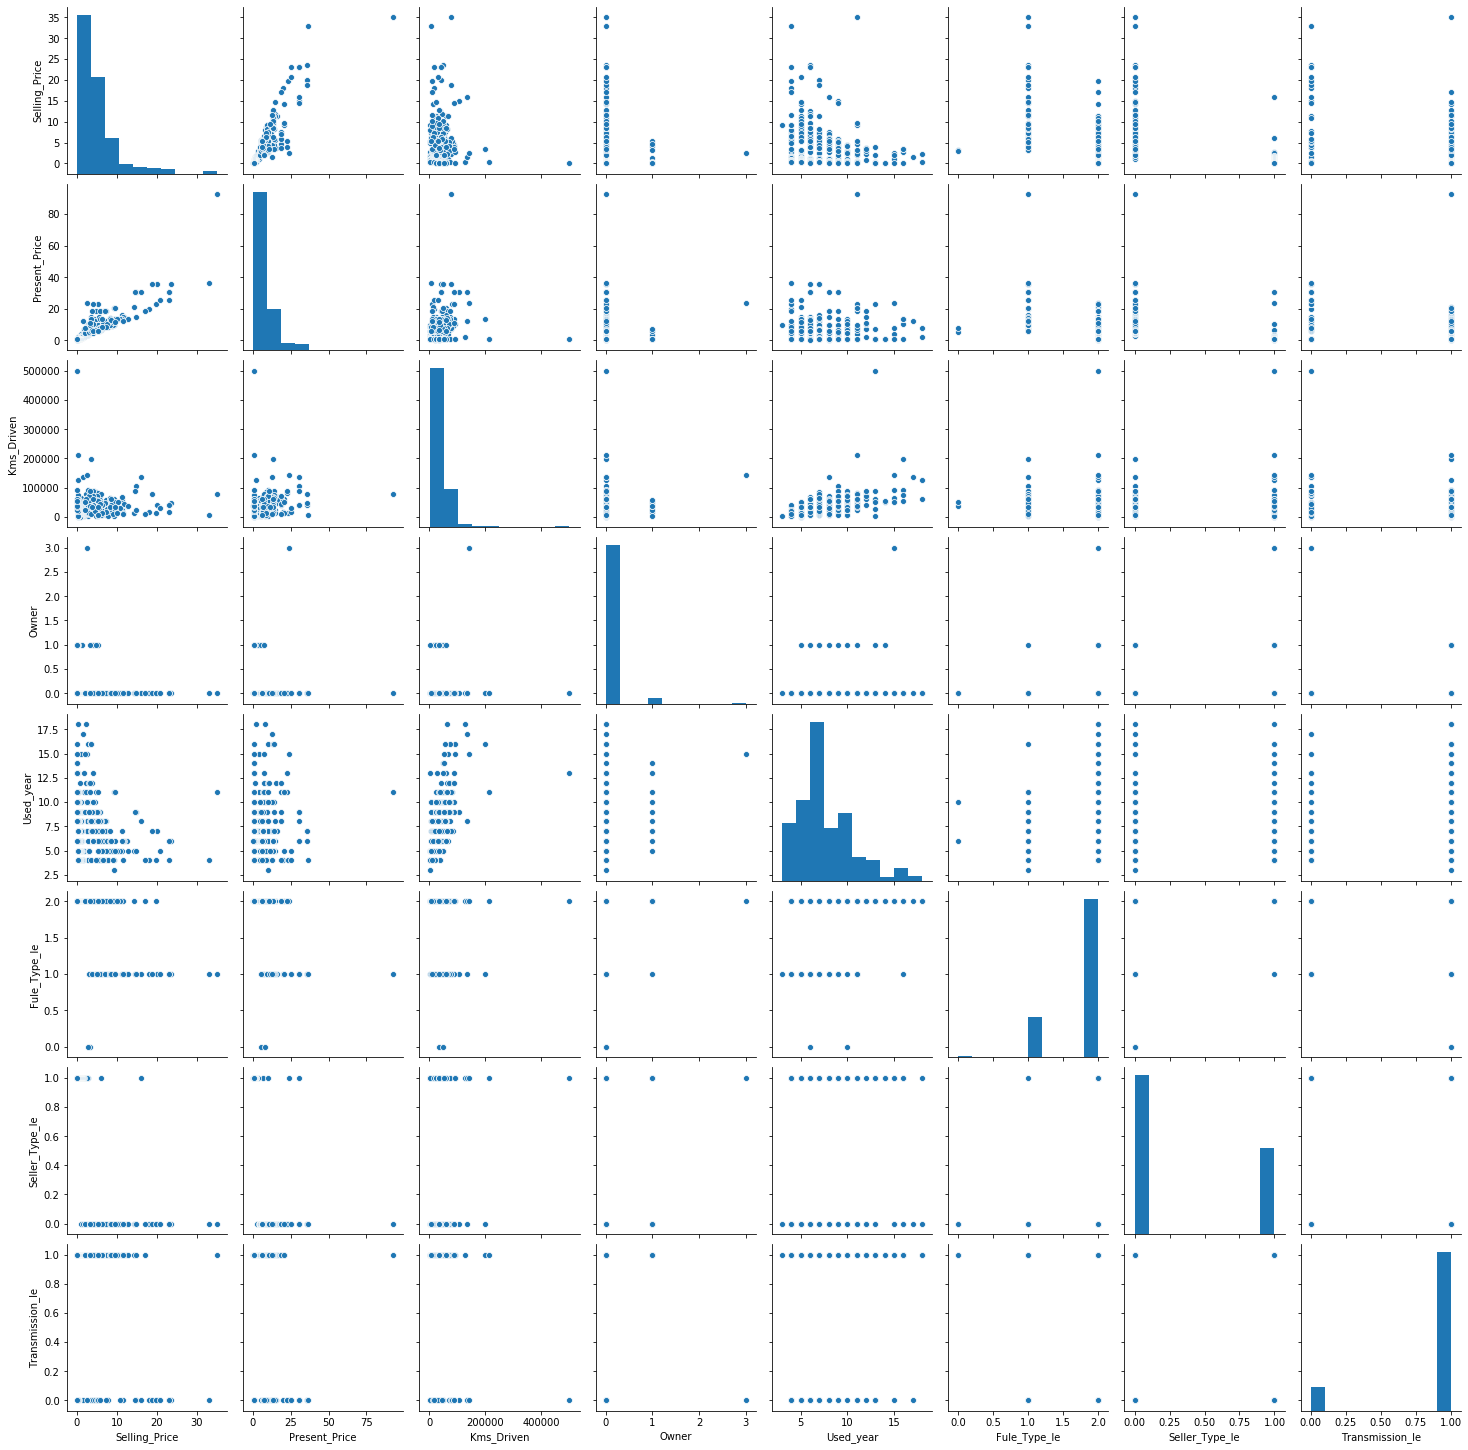

In [17]:
sns.pairplot(final_df)

In [18]:
import matplotlib.pyplot as plt

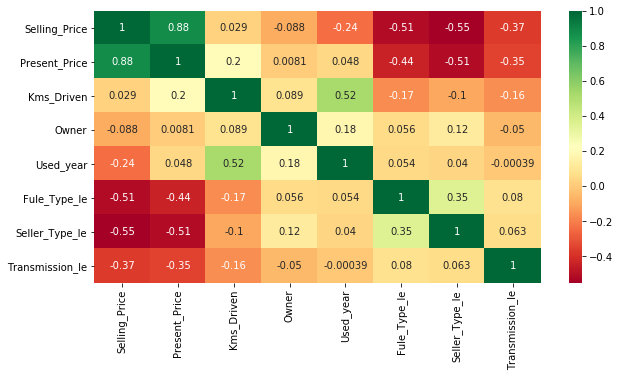

In [19]:
corrmat=final_df.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(10,5))
sns.heatmap(final_df[top_corr_feature].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [20]:
final_df

,Selling_Price,Present_Price,Kms_Driven,Owner,Used_year,Fule_Type_le,Seller_Type_le,Transmission_le
0,3.35,5.59,27000,0,7,2,0,1
1,4.75,9.54,43000,0,8,1,0,1
2,7.25,9.85,6900,0,4,2,0,1
3,2.85,4.15,5200,0,10,2,0,1
4,4.60,6.87,42450,0,7,1,0,1
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,1
297,4.00,5.90,60000,0,6,2,0,1
298,3.35,11.00,87934,0,12,2,0,1
299,11.50,12.50,9000,0,4,1,0,1


In [21]:
X=final_df.drop('Selling_Price',axis=1)
y=final_df.Selling_Price

In [22]:
print(X.shape)
print(y.shape)

(301, 7)
(301,)


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

### Feature Importance

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.4199881  0.03572257 0.00071814 0.08124486 0.13837724 0.24165049
 0.0822986 ]


<function matplotlib.pyplot.show(*args, **kw)>

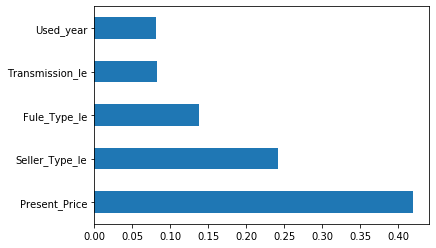

In [25]:
# plot graph  of feature importance for better visualization
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show

In [26]:
X_train.keys()

Index(['Present_Price', 'Kms_Driven', 'Owner', 'Used_year', 'Fule_Type_le',
       'Seller_Type_le', 'Transmission_le'],
      dtype='object')

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor(n_estimators=10)
rf_random.fit(X_train,y_train)
rf_random.score(X_test,y_test)

0.8859138655058815

In [28]:
from sklearn.tree import DecisionTreeRegressor
Dtr=DecisionTreeRegressor()
Dtr.fit(X_train, y_train)
Dtr.score(X_test, y_test)

0.8508103844984553

In [29]:
import pickle
pickle.dump(rf_random,open('rf_random.pkl','wb'))

In [30]:
rf_random.predict([[5.59,27000,0,7,2,0,1]])

array([3.845])